## Exercise 2
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Compute groupby tables and make grouped kernel density plots
- Discuss any interesting patterns (or lack of one) that you observe

In [6]:
import pandas as pd
import numpy as np


df = pd.read_csv('/Users/bellalu/understanding_uncertainty/ds5030-best-group/nhanes_data_17_18.csv', low_memory=False)
df

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns.to_list()

['SEQN',
 'GeneralHealthCondition',
 'EverBreastfedOrFedBreastmilk',
 'AgeStoppedBreastfeedingdays',
 'AgeFirstFedFormuladays',
 'AgeStoppedReceivingFormuladays',
 'AgeStartedOtherFoodbeverage',
 'AgeFirstFedMilkdays',
 'TypeOfMilkFirstFedWholeMilk',
 'TypeOfMilkFirstFed2Milk',
 'TypeOfMilkFirstFed1Milk',
 'TypeOfMilkFirstFedFatFreeMilk',
 'TypeOfMilkFirstFedSoyMilk',
 'TypeOfMilkFirstFedOther',
 'HowHealthyIsTheDiet',
 'Past30DayMilkProductConsumption',
 'YouDrinkWholeOrRegularMilk',
 'YouDrink2FatMilk',
 'YouDrink1FatMilk',
 'YouDrinkFatFreeskimMilk',
 'YouDrinkSoyMilk',
 'YouDrinkAnotherTypeOfMilk',
 'RegularMilkUse5TimesPerWeek',
 'HowOftenDrankMilkAge512',
 'HowOftenDrankMilkAge1317',
 'HowOftenDrankMilkAge1835',
 'CommunitygovernmentMealsDelivered',
 'EatMealsAtCommunityseniorCenter',
 'AttendKindergartenThruHighSchool',
 'SchoolServesSchoolLunches',
 'OfTimesweekGetSchoolLunch',
 'SchoolLunchFreeReducedOrFullPrice',
 'SchoolServeCompleteBreakfastEachDay',
 'OfTimesweekGetSchoolB

In [9]:
#numeric variable
missing_vals =df['OfTimesweekGetSchoolBreakfast'].isnull().sum()
missing_vals

np.int64(6525)

In [ ]:
#categorical variable
missing_vals = df['HowHealthyIsTheDiet'].isnull().sum() 
missing_vals


np.int64(2540)

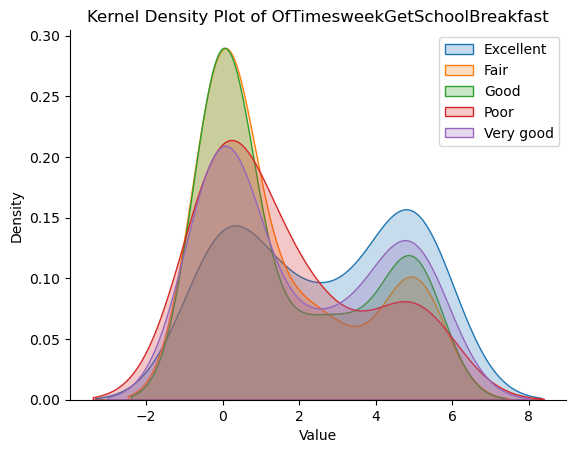

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = df.groupby('HowHealthyIsTheDiet')['OfTimesweekGetSchoolBreakfast']

# Get the grouped data
grouped_data_dict = {name: data.values for name, data in grouped_data}

# Plot the kernel density plots
for name, data in grouped_data_dict.items():
    sns.kdeplot(data=data, label=name, fill=True)
    
sns.despine()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of OfTimesweekGetSchoolBreakfast')

plt.legend()
plt.show()